<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Debt_Equity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [1]:
!pip install fredapi

### **Import Libraries**

In [2]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [4]:
fred = Fred(api_key=userdata.get('FRED'))

### **Data**

In [33]:
debt = fred.get_series('TCMDO').to_frame('Debt')
buffett = fred.get_series('DDDM01USA156NWDB').to_frame('Equity_to_GDP')
gdp = fred.get_series('GDP').to_frame('GDP')
df = pd.concat([debt, buffett, gdp], axis=1).dropna()
df['Equity'] = df['Equity_to_GDP'] * df['GDP'] / 100
df['Debt'] = df['Debt'] / 1e3
df['Equity'] = df['Equity'] / 1e3
df.head()

Debt  Equity_to_GDP       GDP    Equity
1975-01-01  2.488292        41.7709  1616.116  0.675066
1976-01-01  2.727997        47.1386  1820.487  0.858152
1977-01-01  3.035520        40.0724  1988.648  0.796899
1978-01-01  3.456566        36.6543  2202.760  0.807406
1979-01-01  3.949961        37.8175  2526.610  0.955501

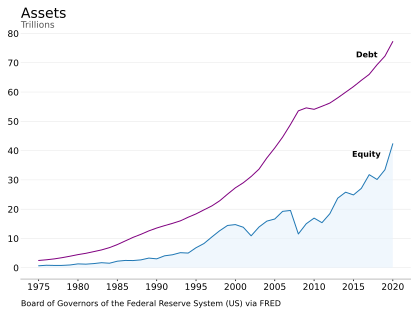

In [36]:
x = df.index
y = df['Equity'].values
y1 =  df['Debt'].values

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
ax.plot(x, y1, color='purple', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Assets', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Trillions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Board of Governors of the Federal Reserve System (US) via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("Debt",
        xy = (0.86, 0.9),
        xycoords='axes fraction',
        ha='left',
        va="center",
        weight='bold',
        fontsize=8)

ax.annotate("Equity",
        xy = (0.85, 0.5),
        xycoords='axes fraction',
        ha='left',
        va="center",
        weight='bold',
        fontsize=8)

plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

fig.savefig("debt_equity.png", bbox_inches="tight", dpi=300)
plt.show()